# Order-Disorder Transformation using Allen - Cahn Equation 

- Step 1 : The order parameter chosen for this microstructure is $\phi$ which is a non - conserved parameter.

> $\phi$ = 1 for Phase 1 ; 
> $\phi$ = 0 for Phase 2 ;

- Step 2 : The free energy functional to describe this problem is 

> $\frac{G}{N_{v}}$ = $\int (f_{0}(\phi) +  \kappa |\Delta \phi|^{2})$

- Step 3 : Phase field equation for this system is :

> $\frac{\partial \phi}{\partial t}$ = $-Lg(\phi) + 2 \kappa L \nabla^2 \phi $

- Step 4 : Solving the equation via semi - implicit spectral method, we get 

$\tilde \phi ^{t + \Delta t}$ = $(\tilde \phi ^{t} - L\Delta t \tilde g ^{t}) / (1 + 2 \kappa k^{2} L \Delta t)$

In 2 Dimension k = $k_{x}^{2} + k_{y}^{2}$

In [1]:
# importing libraries
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import pyplot as plt, cm
import random 

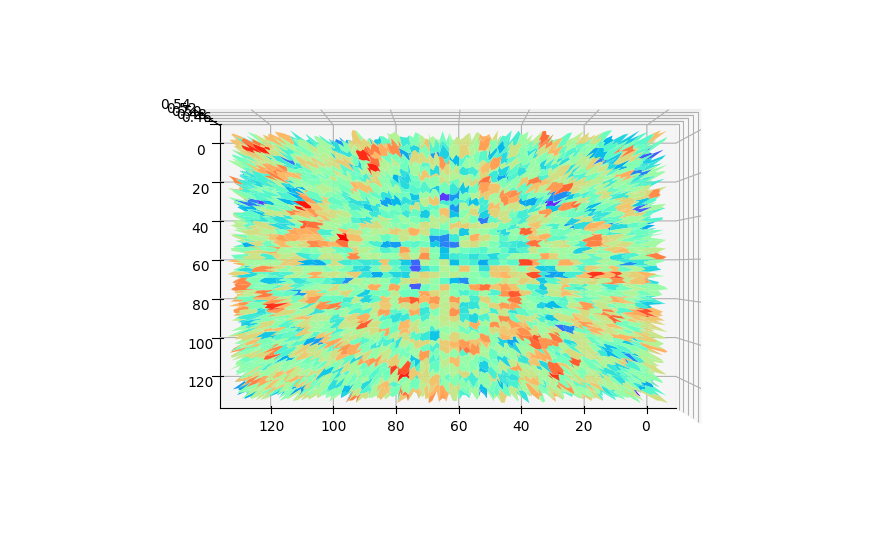

In [2]:
# defining the paramters 
kappa = 1.0
A = 1.0
L = 1.0
Nx = 128 # no. of grid points in x axis
Ny = 128 # no. of grid points in y axis
halfNx = Nx/2
halfNy = Ny/2
dt = 0.5
delkx = 2 * np.pi / Nx
delky = 2 * np.pi / Ny

x = np.arange(0,Nx,1)
y = np.arange(0,Ny,1)

X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx,Ny)) # order parameter vector
# defining the initial profile
for i in range (0,Nx) :
    for j in range (0,Ny) :
        phi[i][j] = 0.5 + 0.1 * (0.5 - random.random())
# plotting the inital profile
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, phi[:],cmap=cm.rainbow) 
ax.view_init(90,90)   

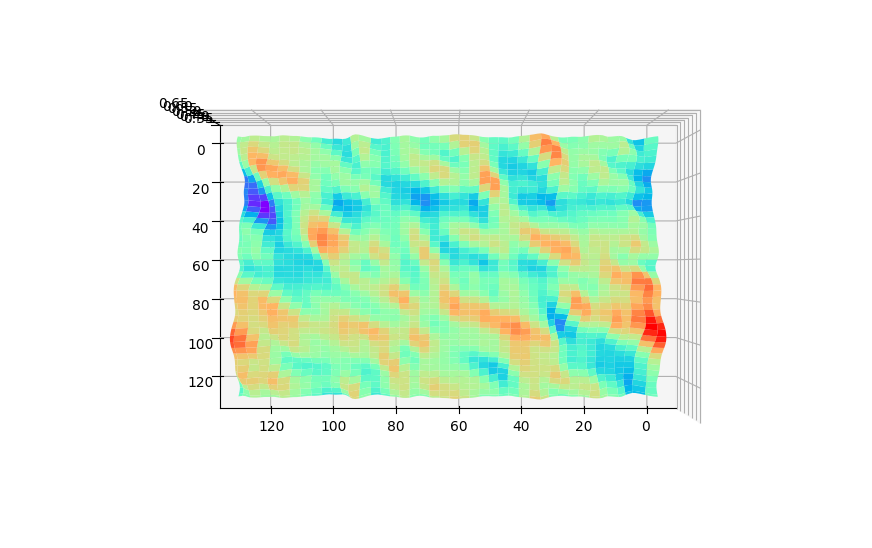

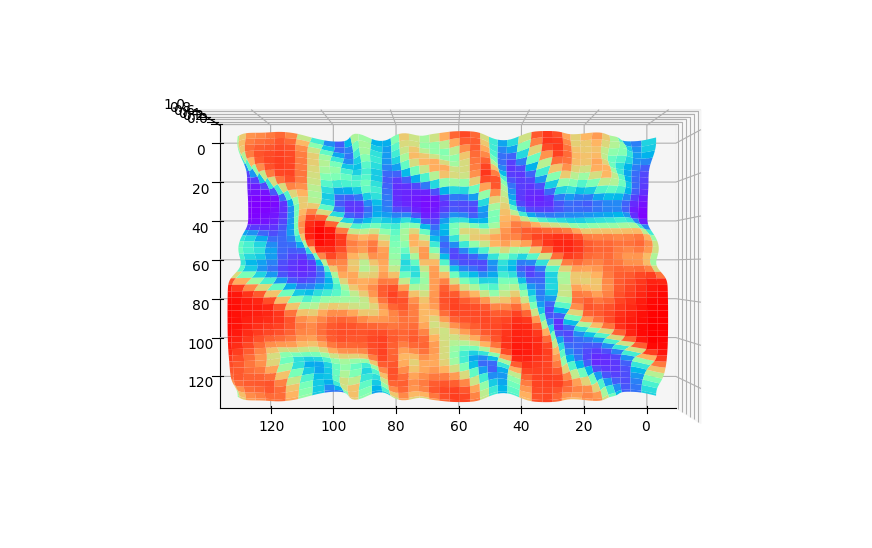

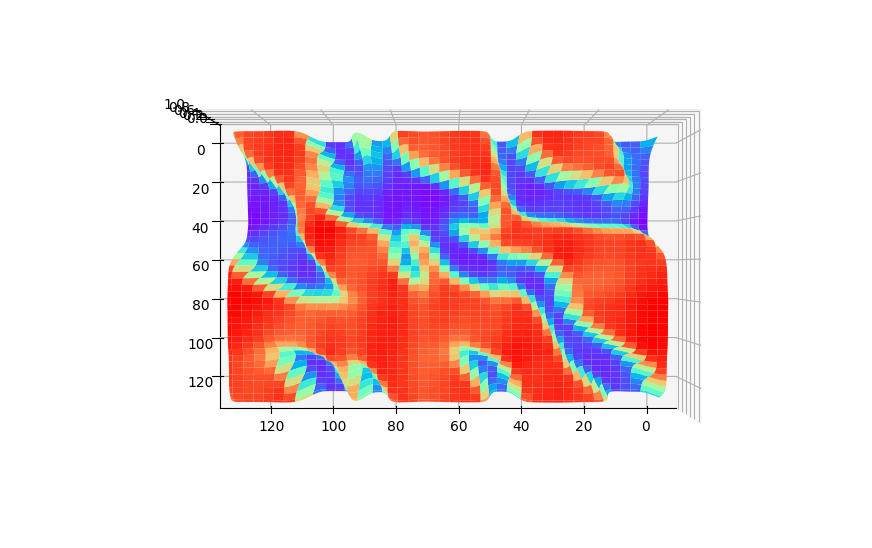

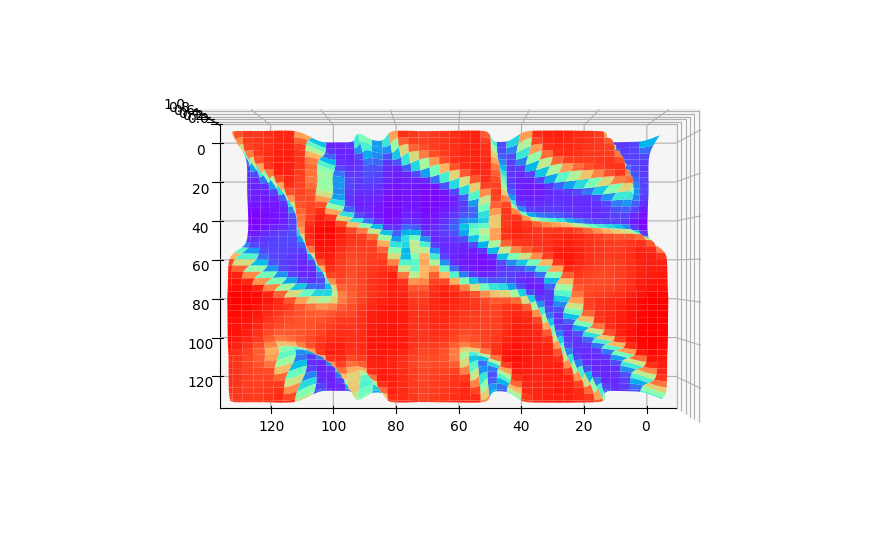

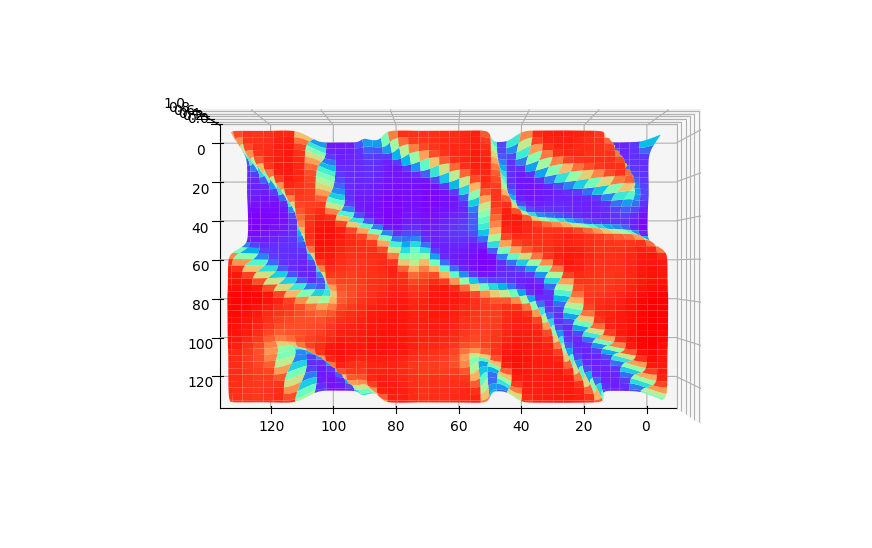

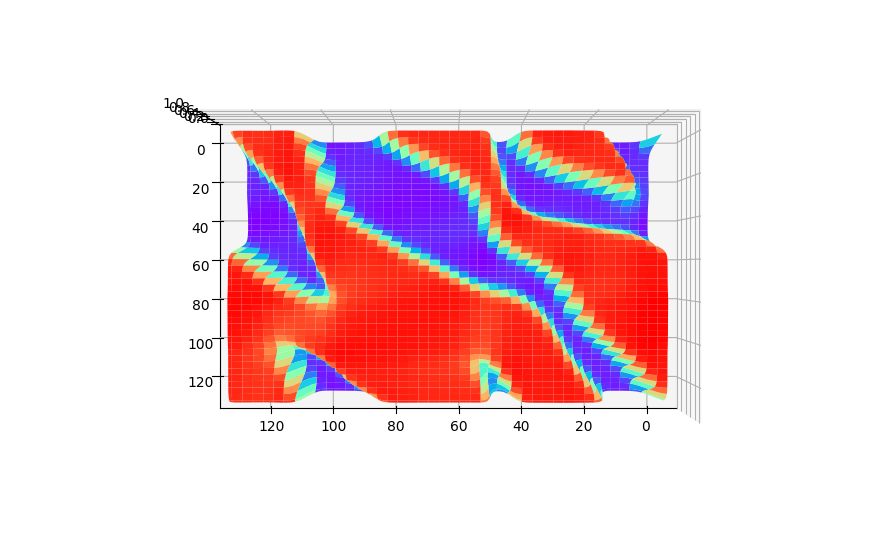

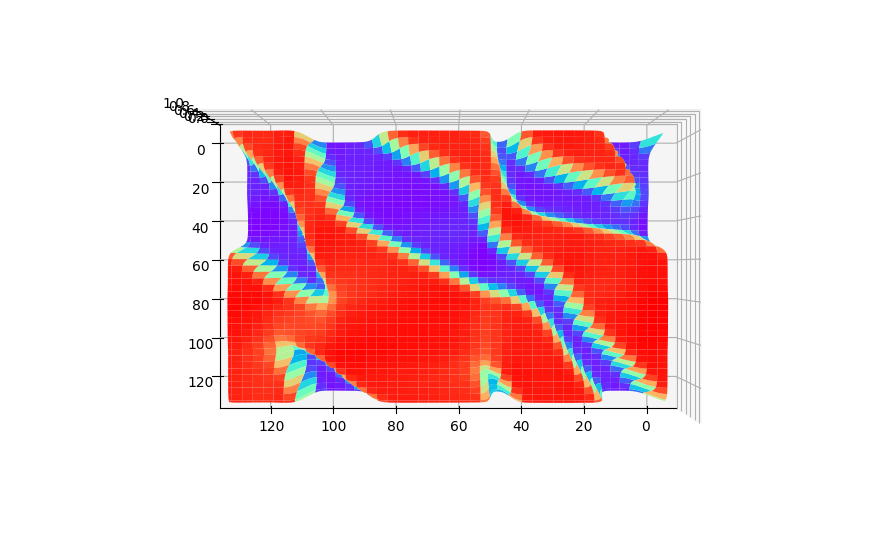

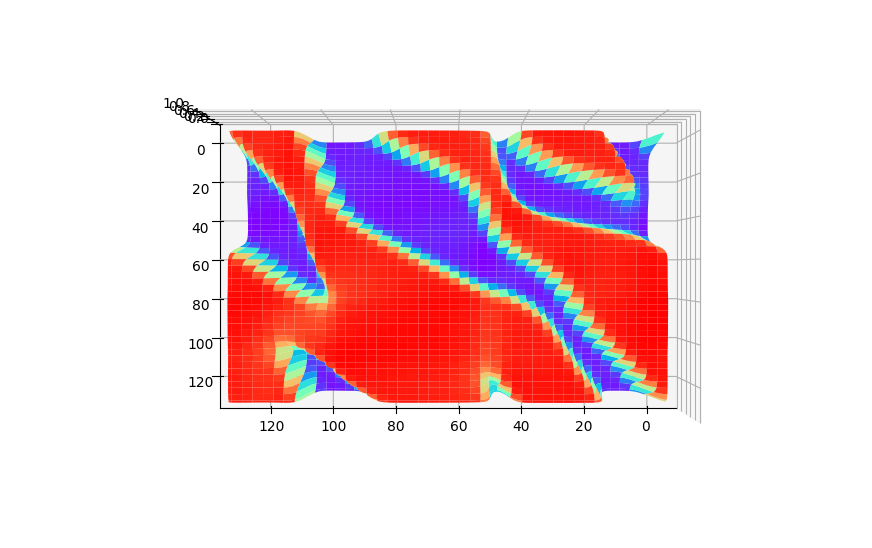

In [3]:
kx = 1.0
ky = 1.0

# defining the fourier space reciprocal vectors 
g = np.zeros((Nx,Ny))
ghat = np.zeros((Nx,Ny))
phihat = np.zeros((Nx,Ny))

for m in range (0,8) : # outer - time loop
    
    for n in range (0,8) : # inner - time loop
        # evolving the derivative of f0
        for i in range (0,Nx):
            for j in range (0,Ny):
                
                g[i][j] = 2 * A * phi[i][j] * (1 - phi[i][j]) * (1 - 2*phi[i][j])
        
        ghat = np.fft.fft2(g)
        phihat = np.fft.fft2(phi)
        
        for i in range (0,Nx) :
            # implementing PBCs for x
            if (i <= halfNx):
                kx = i * delkx 
            if (i > halfNx) :
                kx = (i-Nx) * delkx 
            
            for j in range (0,Ny) :
                # implementing PBCS for y
                if (j <= halfNy):
                    ky = j * delky 
                if (j > halfNy) :
                    ky = (i-Ny) * delky 
                    
                k2 = kx*kx + ky*ky 
                # evolving the Allen-Cahn eqn in fourier space
                phihat[i][j] = (phihat[i][j] - L * dt * ghat[i][j]) / (1 + 2 * kappa * k2 * L * dt)
        
        phi = np.real(np.fft.ifft2(phihat))
     # plotting the evolution profiles   
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    surf2 = ax.plot_surface(X, Y, phi[:], cmap=cm.rainbow)
    ax.view_init(90, 90)        